### Exploratory Data Analysis 
- In Notebook We are going to analyse the jobs that we have collected in LinkedIn and see which jobs keep repeating to later be able to drop it and also observe which jobs are on demand for this season 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [34]:
df = pd.read_csv(r"/Users/alex/Desktop/The Knowledge House/Capstone_Project/Code/job_list.csv")
df

,job_title,company_name,time_posted,num_applicants,employment_type,salary
0,"Data Scientist, Small Business Group",Meta,1 day ago,77 applicants,Not Applicable,"Base pay range\n\n $134,000.00/yr - $204,..."
1,Junior Data Scientist,Team Remotely Inc,1 day ago,100 applicants,Entry level,NaN
2,ML Engineer-AI/ML,Zortech Solutions,1 day ago,49 applicants,Entry level,NaN
3,"Data Scientist, Analytics",DoorDash,NaN,NaN,Entry level,"Base pay range\n\n $133,000.00/yr - $243,..."
4,Junior Data Scientist,LTIMindtree,NaN,NaN,Entry level,NaN
...,...,...,...,...,...,...
344,Business Systems Analyst,Vernovis,NaN,78 applicants,Mid-Senior level,"Base pay range\n\n $110,000.00/yr - $115,..."
345,Data and Analytics Specialist,UBS,6 days ago,NaN,Not Applicable,NaN
346,Are you a Document Administrator looking for c...,eStaffing Inc.,3 weeks ago,NaN,Entry level,Base pay range\n\n $40.00/hr - $60.00/hr
347,Digital Associate,PLUS Communications,2 days ago,NaN,Associate,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        317 non-null    object
 1   company_name     317 non-null    object
 2   time_posted      197 non-null    object
 3   num_applicants   173 non-null    object
 4   employment_type  317 non-null    object
 5   salary           109 non-null    object
dtypes: object(6)
memory usage: 16.5+ KB


In [37]:
df.isnull().sum()

job_title           32
company_name        32
time_posted        152
num_applicants     176
employment_type     32
salary             240
dtype: int64

In [74]:
df['salary'].value_counts()

salary
Base pay range\n\n      $94,300.00/yr - $198,600.00/yr     6
Base pay range\n\n      $120,000.00/yr - $150,000.00/yr    4
Base pay range\n\n      $110,000.00/yr - $130,000.00/yr    3
Base pay range\n\n      $28.00/hr - $30.00/hr              3
Base pay range\n\n      $40.00/hr - $60.00/hr              3
                                                          ..
Base pay range\n\n      $62,525.00/yr - $93,766.00/yr      1
Base pay range\n\n      $58,000.00/yr - $70,000.00/yr      1
Base pay range\n\n      $90,000.00/yr - $134,000.00/yr     1
Base pay range\n\n      $50.00/hr - $55.00/hr              1
Base pay range\n\n      $110,000.00/yr - $115,000.00/yr    1
Name: count, Length: 83, dtype: int64

In [63]:
df['job_title'].value_counts()

job_title
Data Scientist                                                                33
Data Analyst                                                                  17
Data Engineer                                                                  7
Business Analyst                                                               7
Senior Data Scientist                                                          7
                                                                              ..
Machine Learning Engineer/SRE-100% Remote                                      1
AI Systems Engineer                                                            1
Analytics Manager #PP                                                          1
Entry Level Business/Data Analyst                                              1
Are you a Document Administrator looking for career change to Data Science     1
Name: count, Length: 198, dtype: int64

In [69]:
df['company_name'].value_counts()


company_name
Microsoft                15
SynergisticIT             7
Unreal Staffing, Inc      6
Jobot                     5
Steneral Consulting       5
                         ..
Avispa                    1
Asta Crs Inc              1
Vanilla                   1
Tranzeal Incorporated     1
UBS                       1
Name: count, Length: 226, dtype: int64

In [41]:
df['employment_type'].value_counts()

employment_type
Mid-Senior level    111
Entry level          99
Not Applicable       49
Associate            34
Director             14
Internship           10
Name: count, dtype: int64

### Univariant



/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


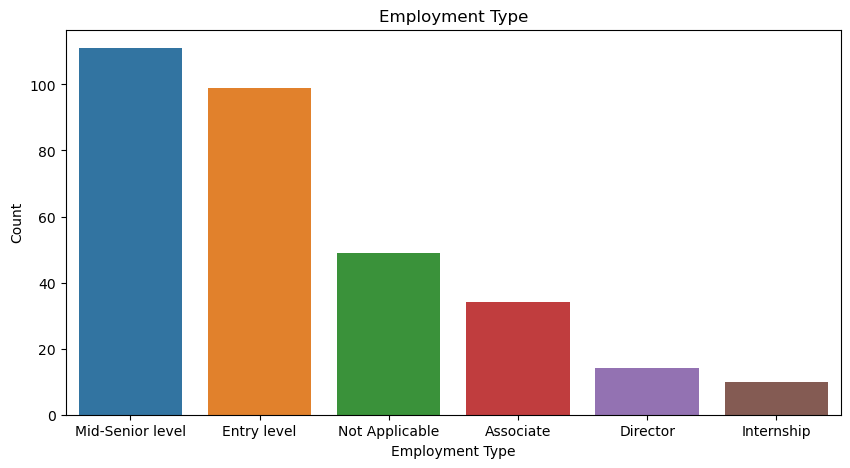

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(x='employment_type', data=df, order = df['employment_type'].value_counts().index)
plt.title('Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


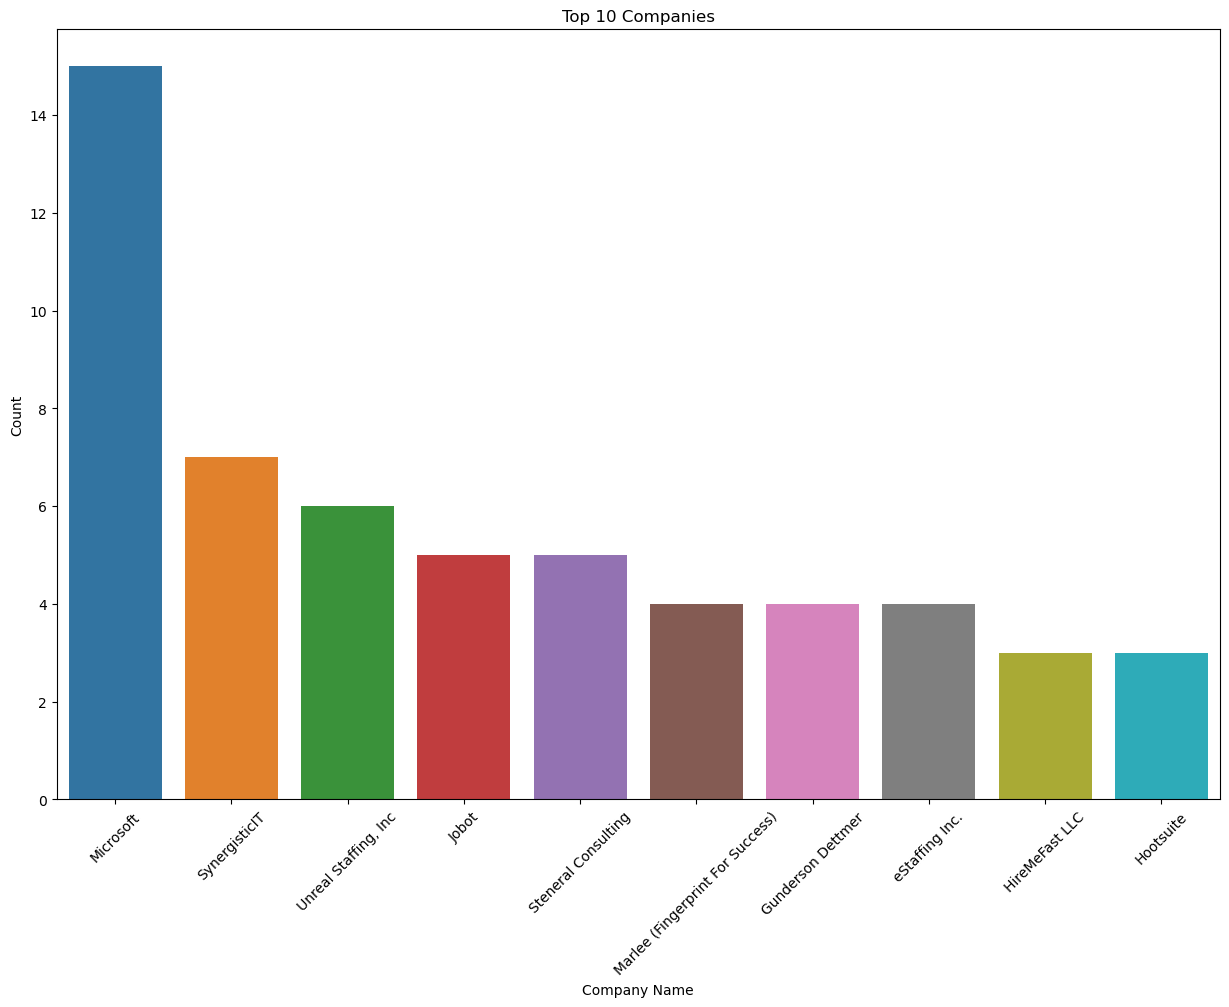

In [100]:
plt.figure(figsize=(15, 10))
sns.countplot(x="company_name", data=df, order = df['company_name'].value_counts().iloc[:10].index)
plt.title('Top 10 Companies')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


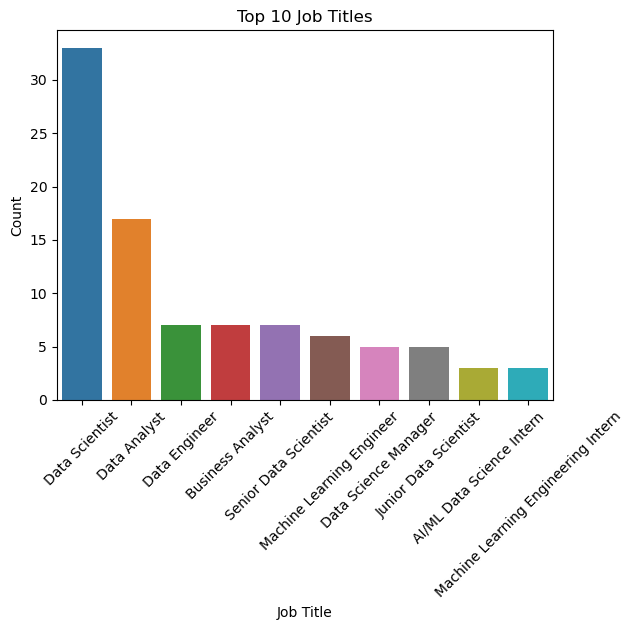

In [102]:
sns.countplot(x="job_title", data=df, order = df['job_title'].value_counts().iloc[:10].index)
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()